## Lesson: Intelligent Agents

We will cover:
1. PEAS for different agents
2. Simple reflex agent
3. Model-based reflex agent
4. NetLogo - multiagents example

### 1. PEAS excercise

For each of the following agents, develop a PEAS description of the task environment:<br>
a) Robot soccer player; <br>
b) Internet book-shopping agent; <br>
c) Part-picking robot; <br>
d) Satellite image analysis system. <br> 

|Task||Performance Measure|Environment|Actuators|Sensors| 
| --- || --- | --- | --- | --- |
|Robot soccer player|| | | | |
|Internet book-shopping agent|| | | | |
|Part-picking robot|| | | | |
|Satellite image analysis system|| | | | |

#### Solution

|Task || Performance Measure | Environment | Actuators | Sensors | 
|---||---|---|---|---|
|Robot soccer player|| Score of the team or the competitor, winning game |Ball, team members, competitors, a sport ground | The robot devices, such as legs for running and kicking  | Video camera, communication links among team members, orientation sensors, touch sensors  |
|Internet book-shopping agent|| Minimizing cost, information about interesting books | The Internet, browsers | Add a new order, retrieve existing order information, display information to user  | Web pages, buttons or hyperlinks clicked by users  |
|Part-picking robot|| Percentage of parts in correct bins | Conveyor belt with parts, bins | Jointed arms and hand| Camera, joint angle sensors|
|Satellite image analysis system || Correct image categorization | Downlink from orbiting satellite | Display categorization of scene | Color pixel arrays | 

### 2. Simple reflex agent: vacuum cleaning agent

2.1 Write PEAS for a simple reflex agent - vacuum cleaner that can only be in spots A and B, and clean these spots. 

|Task || Performance Measure | Environment | Actuators | Sensors | 
|---||---|---|---|---|

#### Solution

|Task || Performance Measure | Environment | Actuators | Sensors | 
|---||---|---|---|---|
Vacuum cleaner|| cleanness, efficiency| spots A and B | move, suck | dirt detection sensor, location sensor|

2.2. Agent function of vaccum cleaner: if the location where the agent is is dirty - such, move to neighbouring location if the current location is clean. Write an agent program for this agent function. 

#### Solution

**Agent program**

What are the inputs for our agent? <br>
Inputs: position, information if the current location has dirt or not.<br>
position - the current location of vacuum cleaner agent<br>
env - dictionary that contains information about the current state of the location<br>

In [1]:
def VC(position, env):
    if env[position]=="clean":
        if position=="A":
            position="B"
        else:
            position="A"
    else:
        env[position]="clean"
    return position, env

**Enviroment function**

We need to describe the enviroment. We have two locations $A$ and $B$. Each location can be in one of the two states: $clean$ and $dirty$. The location becomes $clean$ if vacuum cleaner agent is at that spot and it sucks in the dirt. Let us assume that spot simply becomes dirty if it was dirty in the last step. What will happend? 

Enviroment change function.

In [2]:
def ENV(env):
    for se in env.keys():
        if env[se]=="clean":
            env[se]="dirty"
    return env

**Performance measure**

Let us assume that dirt is in quants. If the location is dirty there is one quant of dirt. The vacuum cleaner sucks in one quant of dirt. Let our performance measure be cleaness of the enviroment. How we will measure this? In each time step we will calculate the number of clean spots. If all spots are clean we say cleanes is 1, if only one spot is clean cleaness is 0.5, and if both spots are dirty the cleaness is 0. 

*Initial condition of the locations*

In [3]:
spots={}
spots["A"]="clean"
spots["B"]="clean"

*Initial position of vacuum cleaner agent*

In [4]:
vc_position="A"

*Simulation of agents interaction with enviroment*

In [5]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,10):
    timesteps.append(i)
    #update the state of environment
    spots=ENV(spots)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots=VC(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)

**Visualisation of enviroment, agents position and performance**

*Visualisation of enviroment*

In [6]:
import numpy as np
DR=np.zeros((2,10))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [7]:
POS=np.zeros((2,10))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

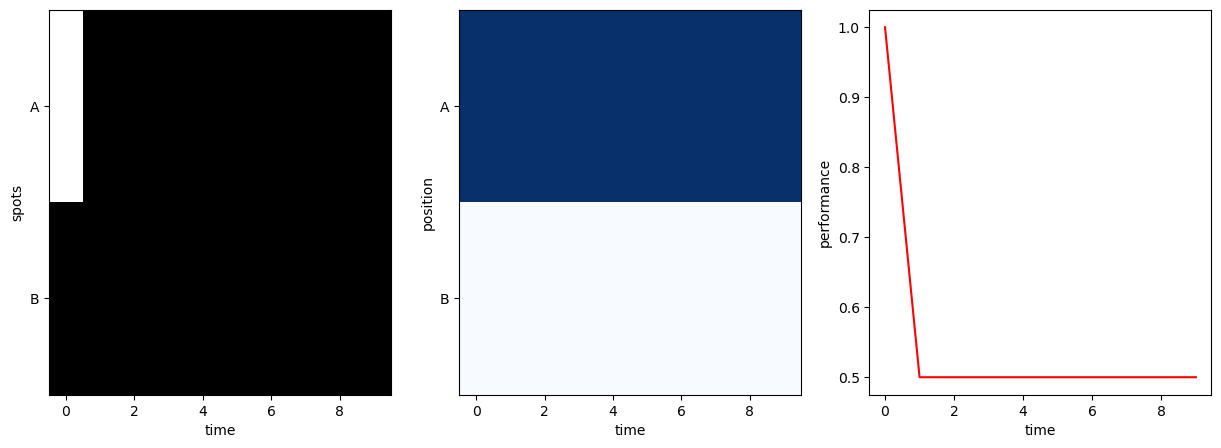

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

2.3 Is our agent rational? Can its performance be better?

**Solution**

Having in mind that the clean location becomes dirty in the next time step, and our agent cant be on two spots at the same, the maximal cleaness is 0.5, i.e., one spot will always be dirty. Our agent is rational.

2.4 Let us change the way the enviroment is updates. Let make our enviroment stochastic. If the location is clean, it will become dirty with 50% of chance. What is the performance of our agent then?

**Solution**

*Enviroment function with random update*

In [9]:
import random as rn
def ENV_r(env,p):
    for se in env.keys():
        if env[se]=="clean":
            ksi=rn.uniform(0,1)
            if ksi<p:
                env[se]="dirty"
    return env

*Initialization*

In [10]:
spots={}
spots["A"]="clean"
spots["B"]="clean"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [11]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,100):
    timesteps.append(i)
    #update the state of enviroment
    spots=ENV_r(spots,0.1)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots=VC(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)

*Visualisation of enviroment*

In [12]:
import numpy as np
DR=np.zeros((2,100))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [13]:
POS=np.zeros((2,100))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

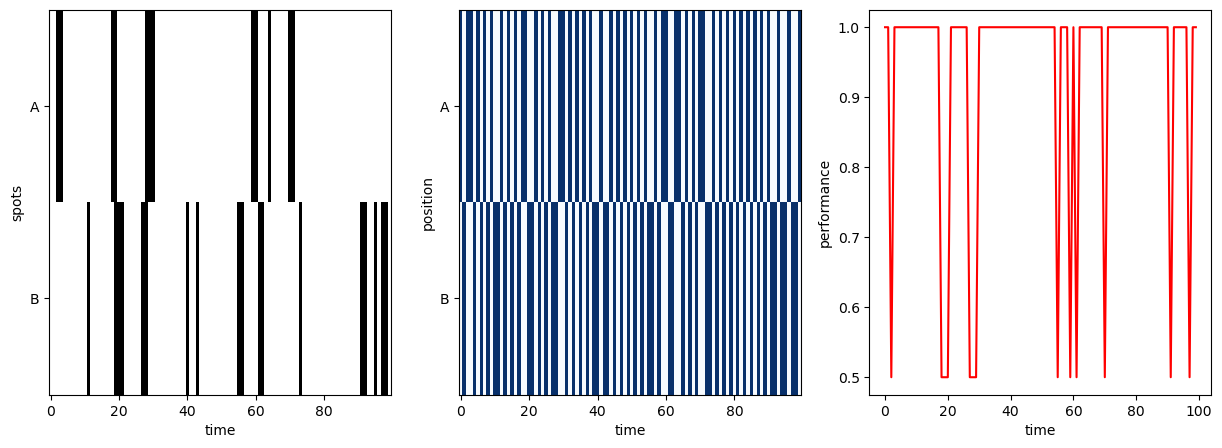

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

2.5. Let us assume that our vacuum cleaner is malfunction. Twenty-five percent of the time, the Suck action fails to clean the floor if it is dirty and deposits dirt onto the floor if the floor is clean. How the performance changes?

*New agent program*

In [15]:
def VC_m1(position, env):
    if env[position]=="clean":
        ksi=rn.uniform(0,1)
        if ksi<=0.25:
            env[position]="dirty"
        else:
            if position=="A":
                position="B"
            else:
                position="A"
    else:
        ksi=rn.uniform(0,1)
        if ksi<=0.75:
            env[position]="clean"
    return position, env

*To make things more simple, we will not update the enviroment.*

*Initialization*

In [16]:
spots={}
spots["A"]="dirty"
spots["B"]="dirty"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [17]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,100):
    timesteps.append(i)
    #vacuum cleaner sensing and action
    vc_position,spots=VC_m1(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)

*Visualisation of enviroment*

In [18]:
import numpy as np
DR=np.zeros((2,100))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [19]:
POS=np.zeros((2,100))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

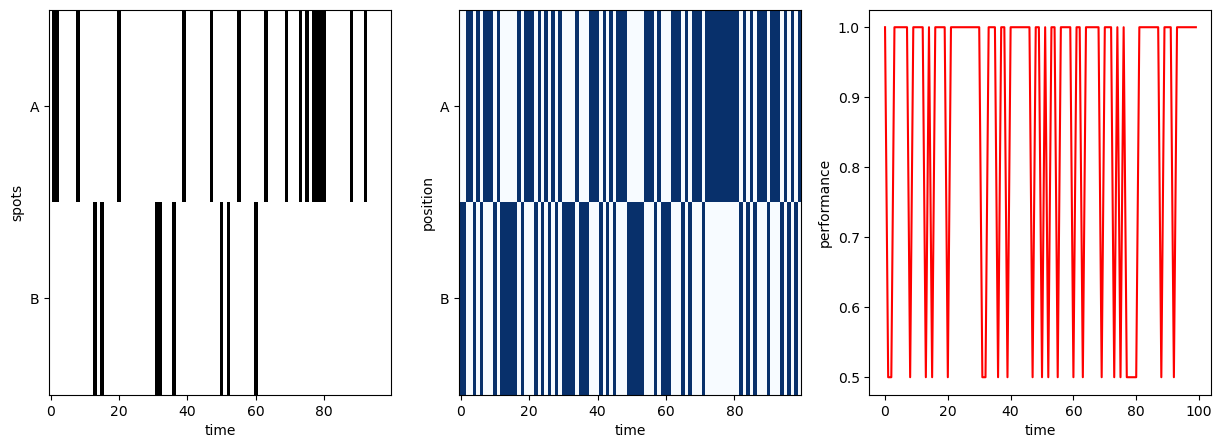

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

Clearly, the performance of malfunctioning vacuum agents is worse. The failure of Suck action doesn’t cause any problem at all as long as we replace the reflex agent’s ‘Suck’ action by ‘Suck until clean’. 

2.6. Let us assume that our vacuum cleaner is malfunction, where its dirt sensor is malfunction. Dirt sensor gives the wrong answer 10% of the time. How the performance changes? 

*New agent program*

In [21]:
def VC_m2(position, env):
    if env[position]=="clean":
        ksi=rn.uniform(0,1)
        if ksi<=0.9:
            if position=="A":
                position="B"
            else:
                position="A"
    else:
        ksi=rn.uniform(0,1)
        if ksi<=0.9:
            env[position]="clean"
        else:
            if position=="A":
                position="B"
            else:
                position="A"
    return position, env

*To make things more simple, we will not update the enviroment.*

*Initialization*

In [22]:
spots={}
spots["A"]="dirty"
spots["B"]="dirty"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [23]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,100):
    timesteps.append(i)
    #vacuum cleaner sensing and action
    vc_position,spots=VC_m2(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)

*Visualisation of enviroment*

In [24]:
import numpy as np
DR=np.zeros((2,100))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [25]:
POS=np.zeros((2,100))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

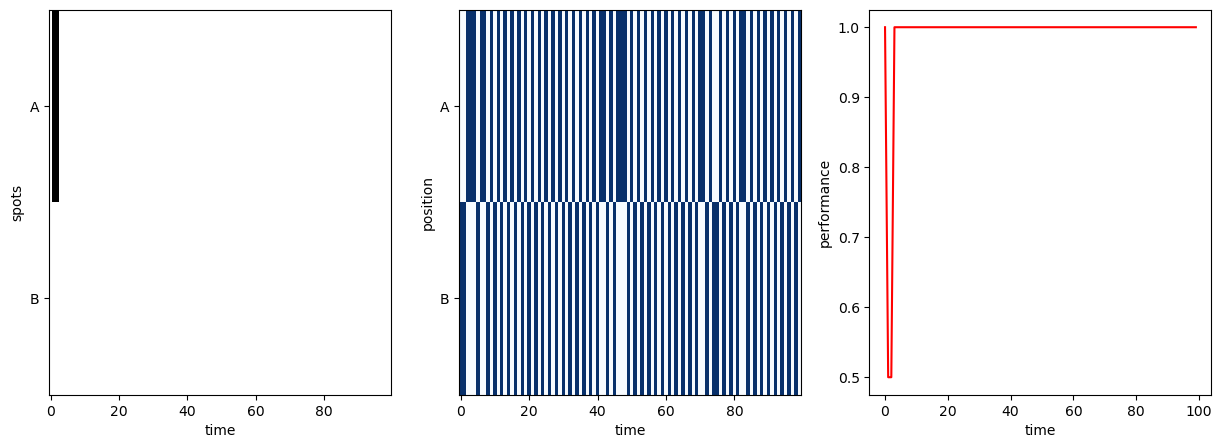

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

### 3. Model-based reflex agents: Model-baced vacuum cleaner

3.1. Let us have a situation where we have a location that if clean becomes dirty with a chance of 50%. What is the 
performance of good functioning simple reflex agent vacuum cleaner?

**Solution**

*Initialization*

In [27]:
spots={}
spots["A"]="clean"
spots["B"]="clean"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [28]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,100):
    timesteps.append(i)
    #update the state of enviroment
    spots=ENV_r(spots,0.5)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots=VC(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)

*Visualisation of enviroment*

In [29]:
import numpy as np
DR=np.zeros((2,100))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [30]:
POS=np.zeros((2,100))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

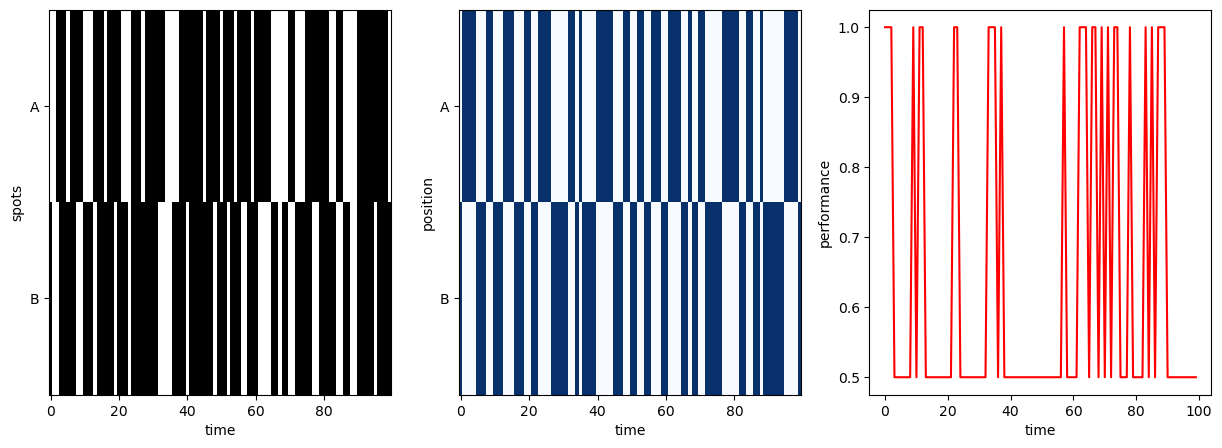

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")
plt.plot(timesteps, performance, 'r-')
plt.show()

3.2. Let us create a model-based reflex agent. This agent behaves more or less similar to simple reflex agent, except it has an information about the current state of both locations, and if both of them are clean it dose not move. If we choose the same performance function, what is the performance of this agent if the enviroment is updates in the same way as in 3.1? 

*New agent program*

In [32]:
def VC_MB(position, env):
    if env["A"]=="clean" and env["B"]=="clean":
        position=position
    else:
        if env[position]=="clean":
            if position=="A":
                position="B"
            else:
                position="A"
        else:
            env[position]="clean"
    return position, env

*Initialization*

In [33]:
spots={}
spots["A"]="dirty"
spots["B"]="dirty"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [34]:
positions=[]
performance=[]
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
for i in range(1,100):
    timesteps.append(i)
    #update the state of enviroment
    spots=ENV_r(spots,0.5)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots=VC(vc_position,spots)
    positions.append(vc_position)
    if spots["A"]=="clean":
        if spots["B"]=="clean": 
            performance.append(1)
        else:
            performance.append(0.5)
    else:
        if spots["B"]=="clean": 
            performance.append(0.5)
        else:
            performance.append(0)

*Visualisation of enviroment*

In [35]:
import numpy as np
DR=np.zeros((2,100))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [36]:
POS=np.zeros((2,100))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

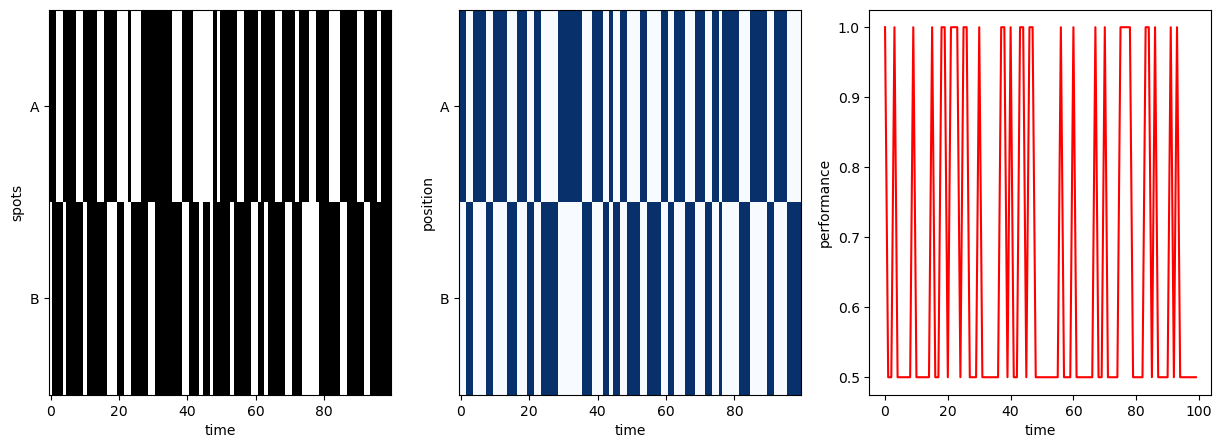

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

We do not see much difference between simple reflex agent and model-based reflex agent

3.3. Can we define different performance function that will show us that model-based reflex agent has better performance?

**Solution**

Let us think about other performance measures. Say we want to look at battery consumption. Each time the agent moves or sucks it uses battery. For simplicity, let us assume that each action uses one quant of energy and for now let us assume that our battery has 100 quants of energy. The performance in this case can be the operation time of the agent or how many simulation steps agent remains active until the battery is spent. 

Let us first change agent program of the simple reflex agent. Now we also need a battery statust of the agent as an information.

In [38]:
def VC1(position, env, bat):
    if env[position]=="clean":
        if position=="A":
            position="B"
            bat=bat-1
        else:
            position="A"
            bat=bat-1
    else:
        env[position]="clean"
        bat=bat-1
    return position, env, bat

*Initialization*

In [39]:
spots={}
spots["A"]="dirty"
spots["B"]="dirty"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [40]:
positions=[]
battery=100
timesteps=[]
positions.append(vc_position)
environment=[]
environment.append(spots)
timesteps.append(0)
performance=[]
performance.append(battery)
i=1
while battery!=0:
    timesteps.append(i)
    #vacuum cleaner sensing and action
    spots=ENV_r(spots,0.1)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots, battery=VC1(vc_position,spots,battery)
    positions.append(vc_position)
    performance.append(battery)
    i+=1

*Visualisation of enviroment*

In [41]:
import numpy as np
DR=np.zeros((2,101))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [42]:
POS=np.zeros((2,101))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

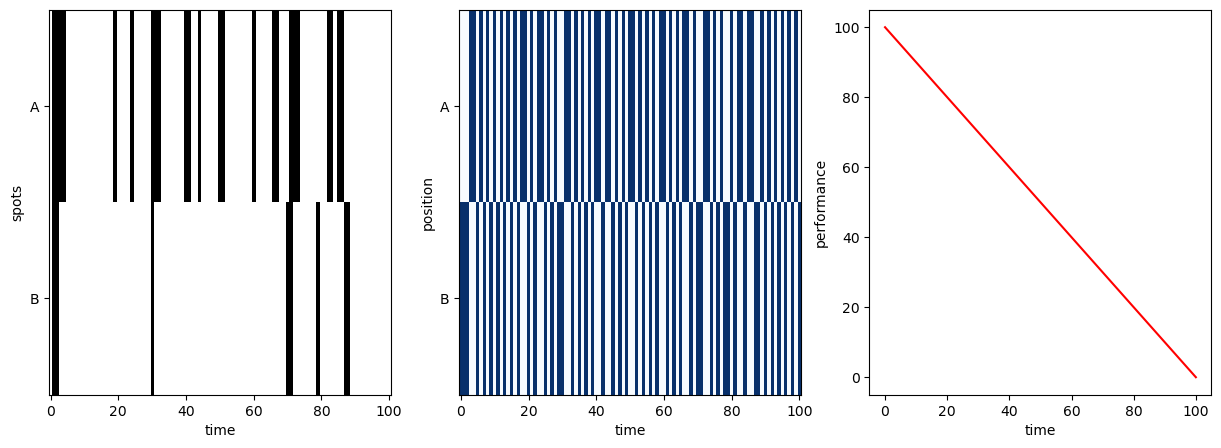

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")
plt.plot(timesteps, performance, 'r-')
plt.show()

Simple reflex agent in each time step either moves or sucks. By defolt it will spend the battery after 100 steps, regardless of enviroment evolution. 

In [44]:
def VC_MB1(position, env, bat):
    if env["A"]=="clean" and env["B"]=="clean":
        position=position
    else:
        if env[position]=="clean":
            if position=="A":
                position="B"
                bat=bat-1
            else:
                position="A"
                bat=bat-1
        else:
            env[position]="clean"
            bat=bat-1
    return position, env, bat

*Initialization*

In [45]:
spots={}
spots["A"]="dirty"
spots["B"]="dirty"
ksi=rn.uniform(0,1)
if ksi<=0.5:
    vc_position="A"
else:
    vc_position="B"

*Simulation*

In [46]:
positions=[]
battery=100
timesteps=[]
positions.append(vc_position)
performance.append(1)
environment=[]
environment.append(spots)
timesteps.append(0)
performance=[]
performance.append(battery)
i=1
while battery!=0:
    timesteps.append(i)
    #vacuum cleaner sensing and action
    spots=ENV_r(spots,0.1)
    x={}
    x["A"]=spots["A"]
    x["B"]=spots["B"]
    environment.append(x)
    #vacuum cleaner sensing and action
    vc_position,spots, battery=VC_MB1(vc_position,spots,battery)
    positions.append(vc_position)
    performance.append(battery)
    i+=1
print(i)

294


*Visualisation of enviroment*

In [47]:
import numpy as np
DR=np.zeros((2,i+1))
for i in range(0,len(environment)):
    if environment[i]["A"]=="clean":
        DR[0][i]=0
    else:
        DR[0][i]=1
    if environment[i]["B"]=="clean":
        DR[1][i]=0
    else:
        DR[1][i]=1

*Visualisation of the agents position*

In [48]:
POS=np.zeros((2,i+1))
for i in range(0,len(positions)):
    if positions[i]=="A":
        POS[0][i]=1
    else:
        POS[1][i]=1

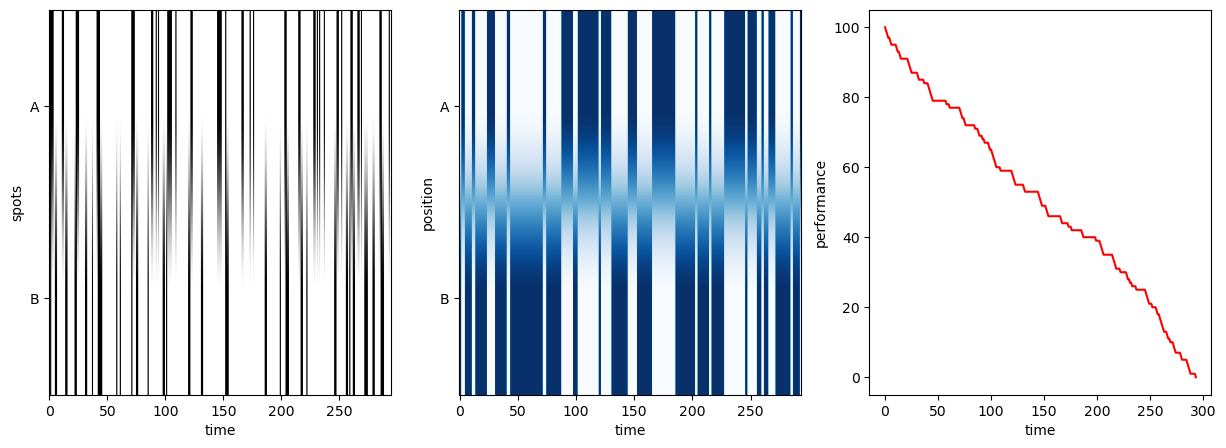

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("spots")
plt.imshow(DR,  aspect='auto', cmap="binary")
plt.subplot(1, 3, 2)
plt.yticks([0,1],["A","B"])
plt.xlabel("time")
plt.ylabel("position")
plt.imshow(POS,  aspect='auto', cmap="Blues")
plt.subplot(1, 3, 3)
plt.ylabel("performance")
plt.xlabel("time")

plt.plot(timesteps, performance, 'r-')
plt.show()

### 4. Schelling's model of segregation - for fun and example of multiagent system

Go to https://www.netlogoweb.org/launch#https://www.netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Erosion.nlogo

Select Sample Model/Social Science/Segregation 

The model is implementation of Schelling's model of segregation https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation

### 5. Homework

Write PEAS for Autonomous Mars rover. Submit your answer in the following form:<br>
Performance Measure: your answer<br>
Environment: your answer<br>
Actuators: your answer <br>
Sensors: your answer <br>

Submission link: https://forms.gle/NbGfMep8nkCuNeUx5

**Deadline:** 21 April 2023 6 PM CET